## Fashion Recommendation System using Image Features

In [8]:
import os
import numpy as np
import glob
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from scipy.spatial.distance import cosine



In [9]:
# Define paths
zip_file_path = 'women-fashion.zip'
extraction_directory = 'extracted_images/'

# Extract the dataset
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List extracted files
image_directory = os.path.join(extraction_directory, 'women fashion')
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg'))]
print(f"Total images: {len(image_paths_list)}")


Total images: 89


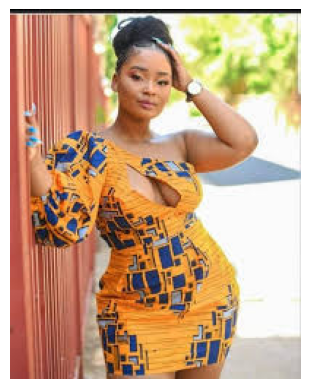

In [11]:
def display_image(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display the first image
display_image(image_paths_list[4])


In [12]:
# Load VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Extract features from all images
all_features = []
all_image_names = []
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))


1/1 [==============================] - 0s 96ms/step


In [13]:
def recommend_fashion_items(input_image_path, all_features, all_image_names, model, top_n=5):
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    for i, idx in enumerate(similar_indices[:top_n], start=1):
        similar_image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(similar_image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 107ms/step


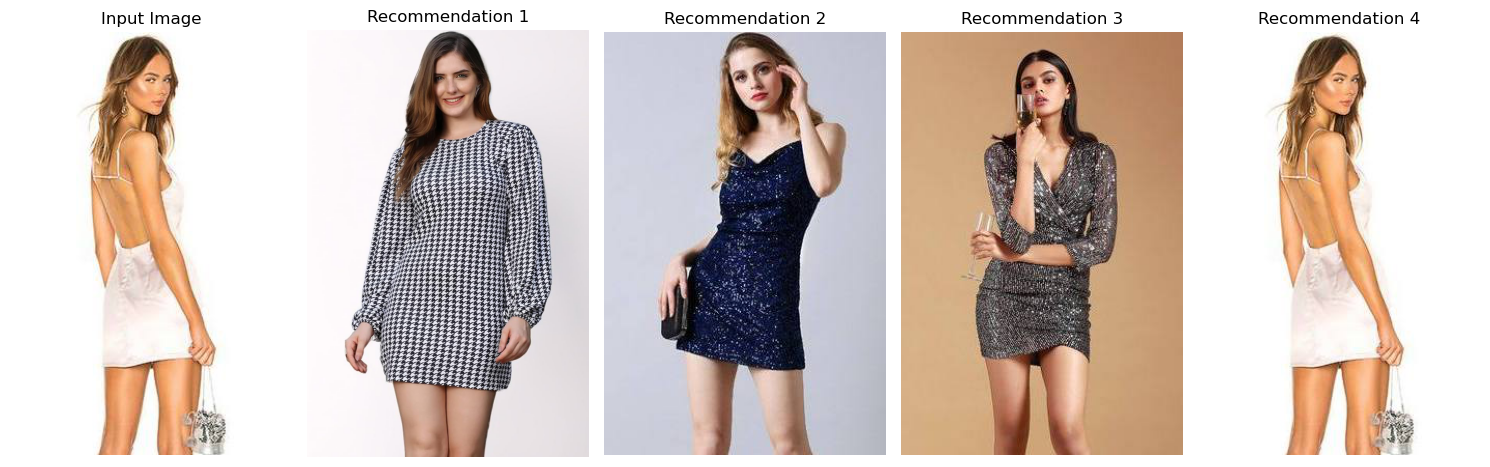

In [14]:
# Provide the path to the input image
input_image_path = image_paths_list[4]
recommend_fashion_items(input_image_path, all_features, all_image_names, model, top_n=4)
